In [91]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import metrics
import mglearn
import math

# matplotlit and seaborn for visualizations
import matplotlib.pyplot as plt
# plt.rcParams['font.size'] = 22
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

# utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
sns.set_style("darkgrid")
# memory management
import gc

In [92]:
import os
# 운영체제별 한글 폰트 설정
if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [3]:
data = pd.read_csv("dataset2.csv")

In [4]:
data.columns

Index(['성별코드', '연령대코드(5세단위)', '신장(5Cm단위)', '체중(5Kg단위)', '허리둘레', '시력(좌)',
       '시력(우)', '청력(좌)', '청력(우)', '수축기혈압', '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤',
       '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤', '혈색소', '요단백', '혈청크레아티닌',
       '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태', '음주여부', '당뇨여부', 'BMI'],
      dtype='object')

In [5]:
# def plot_model(model):
#     n_features = len(X.columns)
#     feature_names = X.columns
#     plt.figure(figsize = (10,8))
#     plt.barh(np.arange(n_features), model.feature_importances_, align="center")
#     plt.yticks(np.arange(n_features), feature_names)
#     plt.xlabel("특성 중요도")
#     plt.ylabel("특성")
#     plt.ylim(-1, n_features)

허연감 필수
(트리글리세라이드, LDL콜레스테롤, 수축기혈압, 이완기혈압, 혈청지오티, BMI) 1~2개 선택

In [6]:
X = data[['허리둘레','연령대코드(5세단위)','감마지티피','트리글리세라이드','LDL콜레스테롤','수축기혈압','이완기혈압','(혈청지오티)AST', '(혈청지오티)ALT','BMI']]
X

,허리둘레,연령대코드(5세단위),감마지티피,트리글리세라이드,LDL콜레스테롤,수축기혈압,이완기혈압,(혈청지오티)AST,(혈청지오티)ALT,BMI
0,90.0,8,40.0,92.0,126.0,120.0,80.0,21.0,35.0,26.0
1,89.0,7,27.0,121.0,148.0,130.0,82.0,20.0,36.0,25.0
2,91.0,9,68.0,104.0,74.0,120.0,70.0,47.0,32.0,28.0
3,91.0,11,18.0,106.0,104.0,145.0,87.0,29.0,34.0,26.0
4,80.0,11,25.0,104.0,117.0,138.0,82.0,19.0,12.0,22.0
...,...,...,...,...,...,...,...,...,...,...
1180115,84.0,13,78.0,85.0,140.0,160.0,90.0,34.0,12.0,24.0
1180116,77.0,8,15.0,139.0,60.0,123.0,89.0,11.0,8.0,20.0
1180117,83.0,14,23.0,122.0,148.0,146.0,69.0,21.0,15.0,23.0
1180118,84.0,14,19.0,173.0,148.0,130.0,80.0,29.0,14.0,23.0


In [7]:
y = data[['당뇨여부']]
y

,당뇨여부
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
1180115,0.0
1180116,0.0
1180117,0.0
1180118,0.0


In [8]:
sum(y['당뇨여부'] == 1)

46579

## Under Sampling

In [93]:
from imblearn.under_sampling import RandomUnderSampler

#당뇨 아닌 사람 수 * sampling_strategy = 당뇨 인 사람 수. 근데 당뇨인 사람 수 고정되어있음
rus = RandomUnderSampler(sampling_strategy=1,random_state=42) 

X_rus, y_rus = rus.fit_resample(X, y)

In [94]:
def under_sampling(X,y,rating):
    rus = RandomUnderSampler(sampling_strategy=rating, random_state=42)
    x_rus, y_rus = rus.fit_resample(X,y)
    return x_rus, y_rus

<AxesSubplot:xlabel='당뇨여부', ylabel='count'>

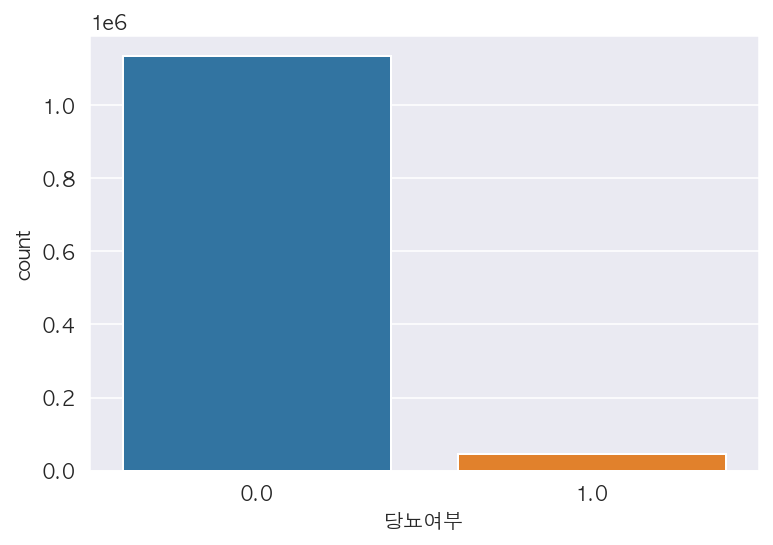

In [95]:
sns.countplot('당뇨여부',data=data)

In [96]:
x_rus1, y_rus1 = under_sampling(X,y,1)     # 1:1
x_rus09, y_rus09 = under_sampling(X,y,0.9) 
x_rus07, y_rus07 = under_sampling(X,y,0.7)
x_rus05, y_rus05 = under_sampling(X,y,0.5) # 1:2
x_rus03, y_rus03 = under_sampling(X,y,0.3)
x_rus01, y_rus01 = under_sampling(X,y,0.1) # 1:9 ?

Text(0.5, 0, '0.1')

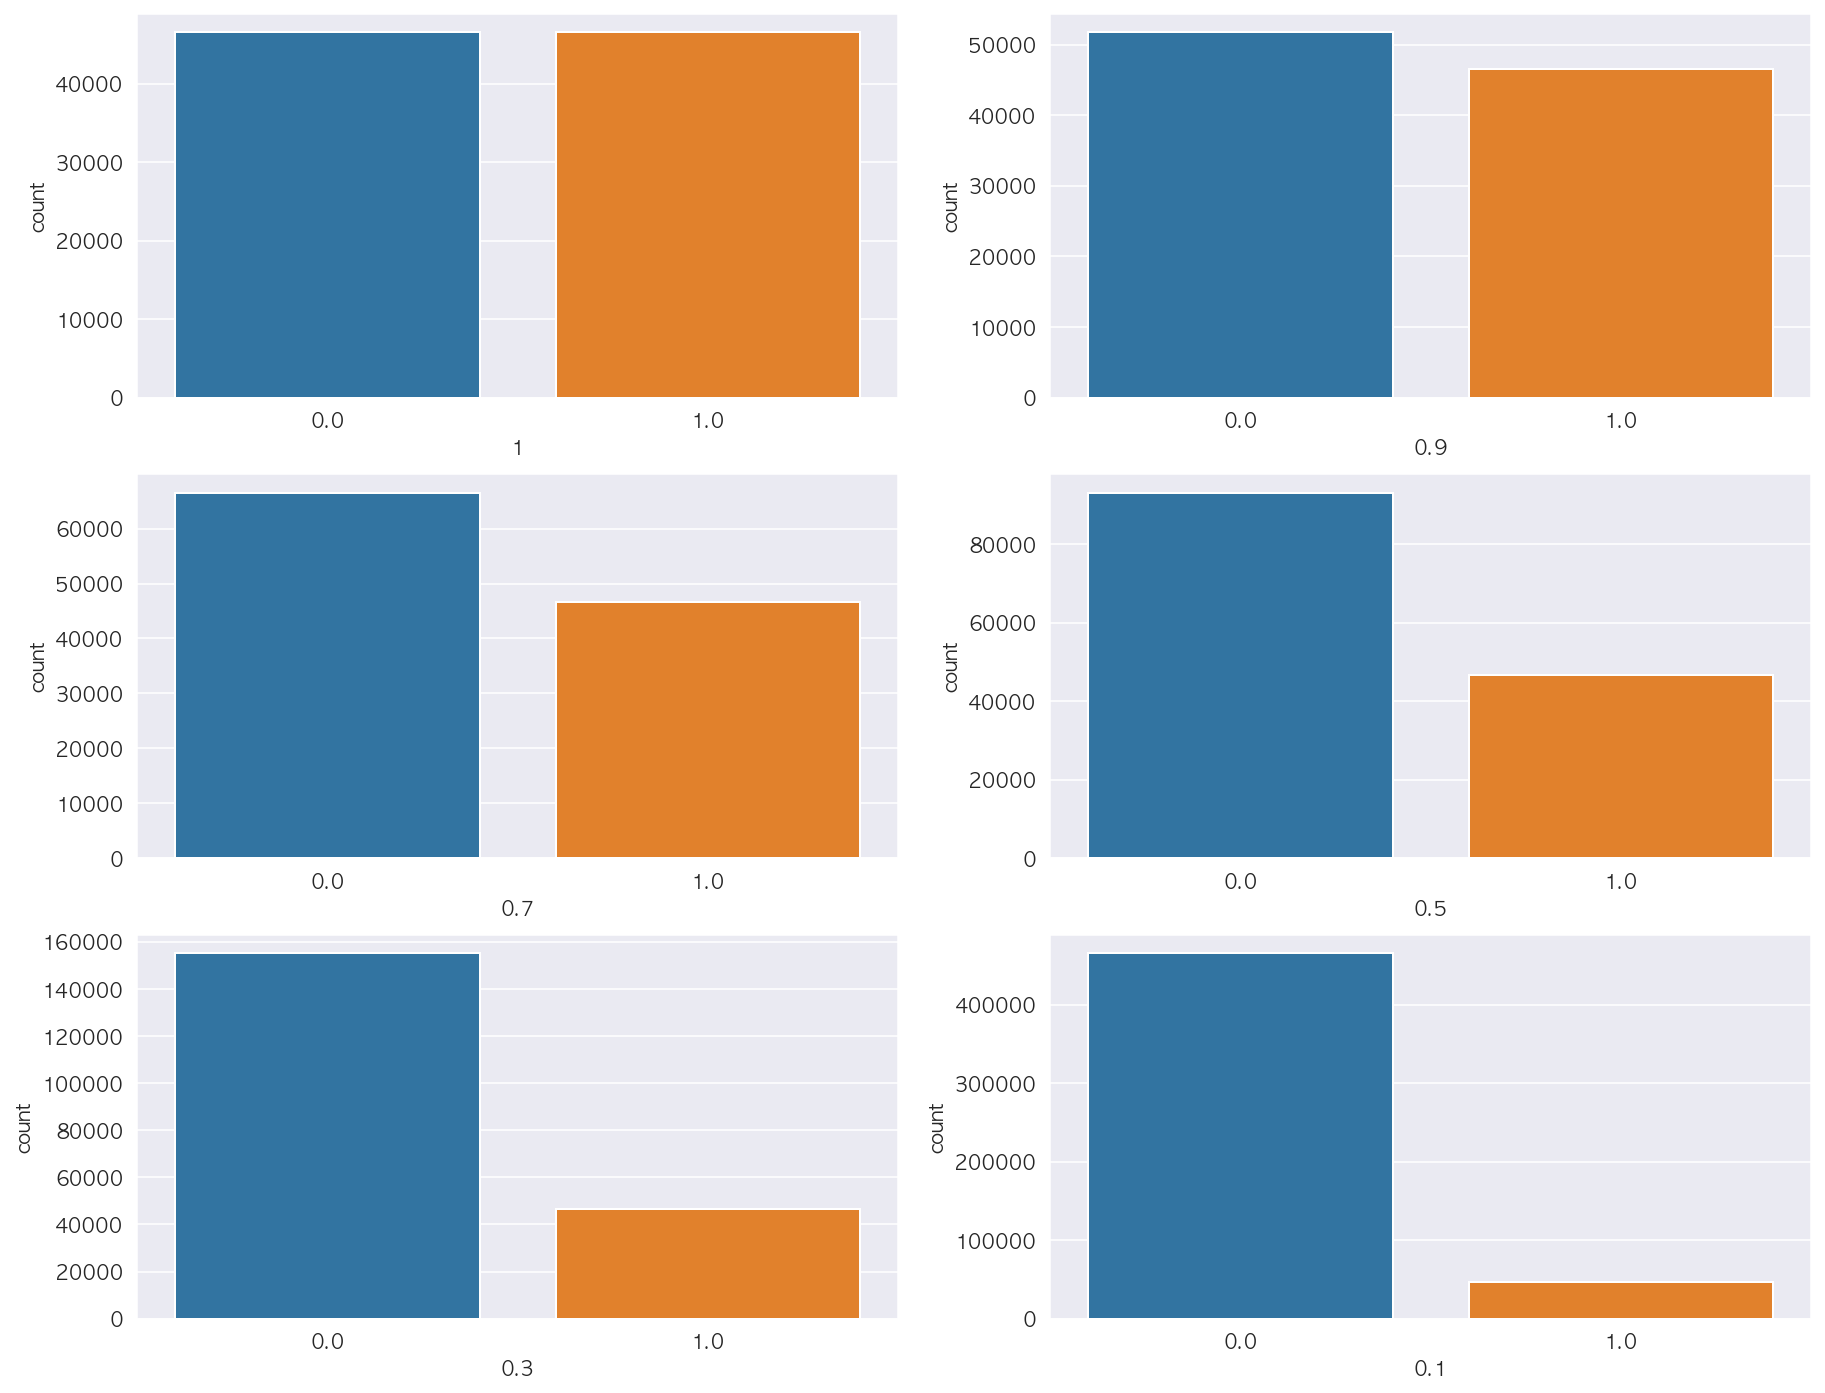

In [97]:
fig, ax = plt.subplots(3,2, figsize=(15,12))

sns.countplot('당뇨여부',data=y_rus1, ax=ax[0,0])
ax[0,0].set_xlabel('1')

sns.countplot('당뇨여부',data=y_rus09, ax=ax[0,1])
ax[0,1].set_xlabel('0.9')

sns.countplot('당뇨여부',data=y_rus07, ax=ax[1,0])
ax[1,0].set_xlabel('0.7')

sns.countplot('당뇨여부',data=y_rus05, ax=ax[1,1])
ax[1,1].set_xlabel('0.5')

sns.countplot('당뇨여부',data=y_rus03, ax=ax[2,0])
ax[2,0].set_xlabel('0.3')

sns.countplot('당뇨여부',data=y_rus01, ax=ax[2,1])
ax[2,1].set_xlabel('0.1')

## Train & Test Data

In [98]:
X_train, X_test, y_train, y_test = train_test_split(x_rus1, y_rus1,stratify=y_rus, test_size=0.2, random_state=42)
X_train09, X_test09, y_train09, y_test09 = train_test_split(x_rus09, y_rus09,stratify=y_rus09, test_size=0.2, random_state=42)
# X_train07, X_test07, y_train07, y_test07 = train_test_split(x_rus07, y_rus07,stratify=y_rus07, test_size=0.2, random_state=42)
X_train05, X_test05, y_train05, y_test05 = train_test_split(x_rus05, y_rus05,stratify=y_rus05, test_size=0.2, random_state=42)
# X_train03, X_test03, y_train03, y_test03 = train_test_split(x_rus03, y_rus03,stratify=y_rus03, test_size=0.2, random_state=42)
X_train01, X_test01, y_train01, y_test01 = train_test_split(x_rus01, y_rus01,stratify=y_rus01, test_size=0.2, random_state=42)

In [15]:
# def plot_model2(model):
#     n_features = len(X.columns)
#     feature_names = X.columns
    
#     plt.figure(figsize = (10,8))
#     coef = model.coef_.reshape(-1,)
#     plt.barh(np.arange(n_features),coef, align="center")
#     plt.yticks(np.arange(n_features), feature_names)
#     plt.xlabel("특성 중요도")
#     plt.ylabel("특성")
#     plt.ylim(-1, n_features)

## linearSVC (support vector classifier)

C 작을수록 훈련이 덜 복잡해서 강한 규제(Overfitting 감소)

In [99]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

### Model

In [100]:
def linearSVC(X,y,scalar=False):

    svc0001 = LinearSVC(C=0.001).fit(X,y)
    svc001 = LinearSVC(C=0.01).fit(X,y)
    svc01 = LinearSVC(C=0.1).fit(X,y)
    svc = LinearSVC(C=1).fit(X,y)  
        
    return svc0001, svc001, svc01, svc

In [101]:
def score(models,X_test,y_test):
    score0001 = models[0].score(X_test, y_test)
    score001 = models[1].score(X_test, y_test)
    score01 = models[2].score(X_test, y_test)
    score = models[3].score(X_test, y_test)
    
    
    return score0001, score001, score01, score

In [102]:
def show_coef(models):
    plt.figure(figsize=(7,5))
    plt.plot(models[0].coef_.T, '*',label="C=0.001")
    plt.plot(models[1].coef_.T, 'v',label="C=0.01")
    plt.plot(models[2].coef_.T, 'o',label="C=0.1")
    plt.plot(models[3].coef_.T, '^',label="C=1")

    plt.xticks(range(len(X.columns)),X.columns,rotation=90)
    xlims = plt.xlim()
    plt.hlines(0,xlims[0],xlims[1])
    plt.legend()

In [103]:
def show_score(scores):
    m = "C"
    s = "0001"
    for i in range(4):
        accuracy = scores[i]
        print(m +" = "+ s[i:])
        print("TestSet accuarcy : {:.9f}\n".format(accuracy))
        
    plt.figure(figsize=(7,5))
    plt.plot(scores)

In [104]:
def confusion_matrix(models, X_test,y_test):
    m = "C"
    s = "0001"
    for i, model in enumerate(models):
        y_pred = model.predict(X_test)
        print(m +" = "+ s[i:])
        print(metrics.confusion_matrix(y_test, y_pred),"\n")

In [125]:
def show_roc_curve(models,X_test,y_test):
    fig = plt.figure(figsize=(8,8)) ## 캔버스 생성
    fig.set_facecolor('white') ## 캔버스 색상 설정
    ax = fig.add_subplot()
    m = "C"
    s = "0001"
    for i, model in enumerate(models):
#         y_test_pred_proba = model.predict_proba(X_test)

        Y_test = model.decision_function(X_test)
        prob = (Y_test - Y_test.min()) / (Y_test.max() - Y_test.min())
        fprs,tprs,thresholds = metrics.roc_curve(y_test, prob)
        
        ax.plot(fprs,tprs,label= m +" = "+ s[i:])

#         ax.plot(fprs , tprs, label='ROC')
    ax.plot([0, 1], [0, 1], "r--", label='Random')
    ax.legend()

## 1:1

In [107]:
models = linearSVC(X_train, y_train)

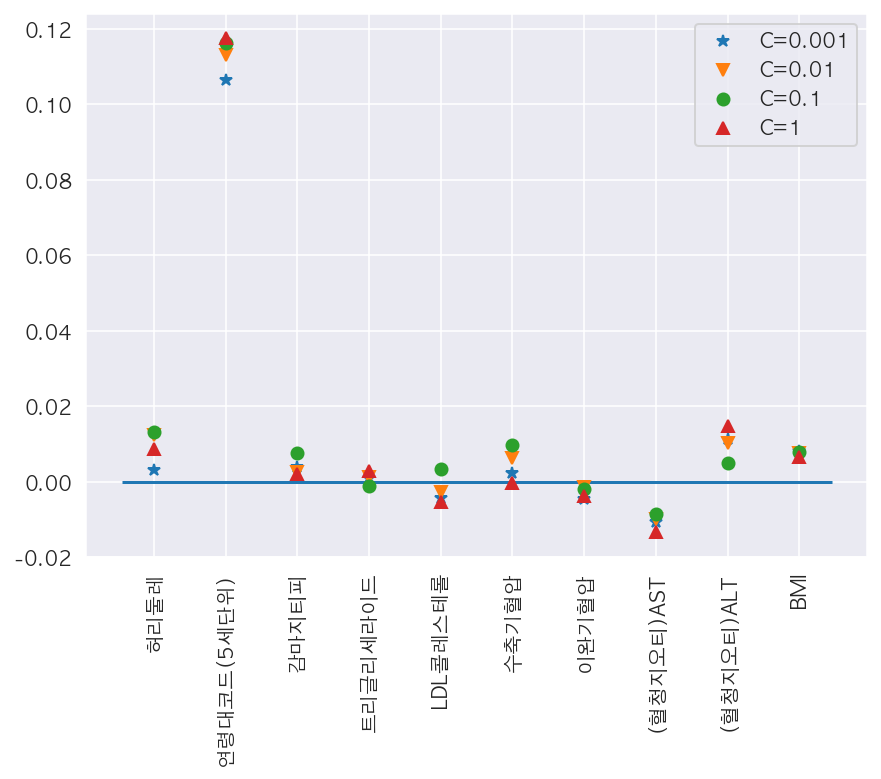

In [108]:
show_coef(models)

C = 0001
TestSet accuarcy : 0.703145127

C = 001
TestSet accuarcy : 0.619418205

C = 01
TestSet accuarcy : 0.511646629

C = 1
TestSet accuarcy : 0.509016745



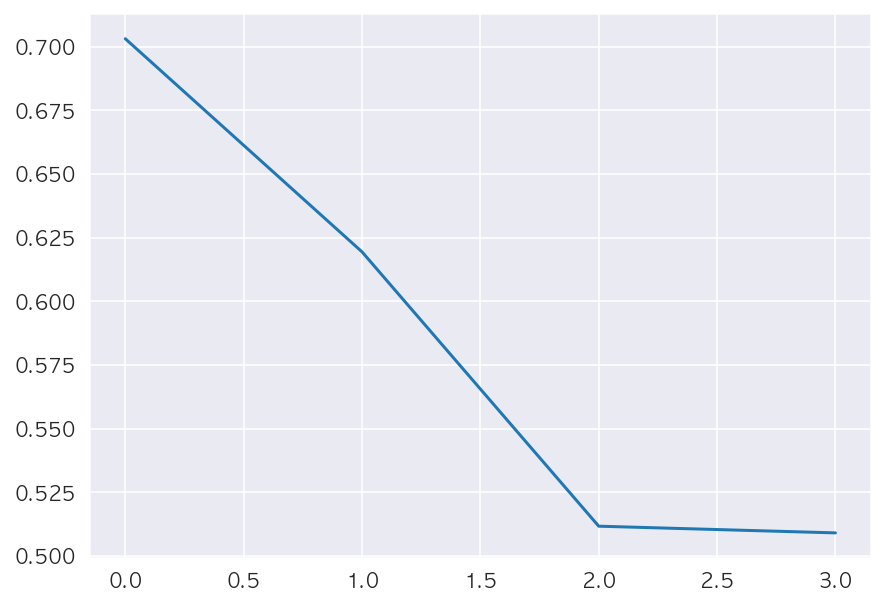

In [109]:
scores = score(models, X_test,y_test)
show_score(scores)

In [25]:
confusion_matrix(models,X_test,y_test)

C = 0001
[[6405 2911]
 [2623 6693]] 

C = 001
[[8240 1076]
 [5846 3470]] 

C = 01
[[8392  924]
 [6307 3009]] 

C = 1
[[1528 7788]
 [ 103 9213]] 



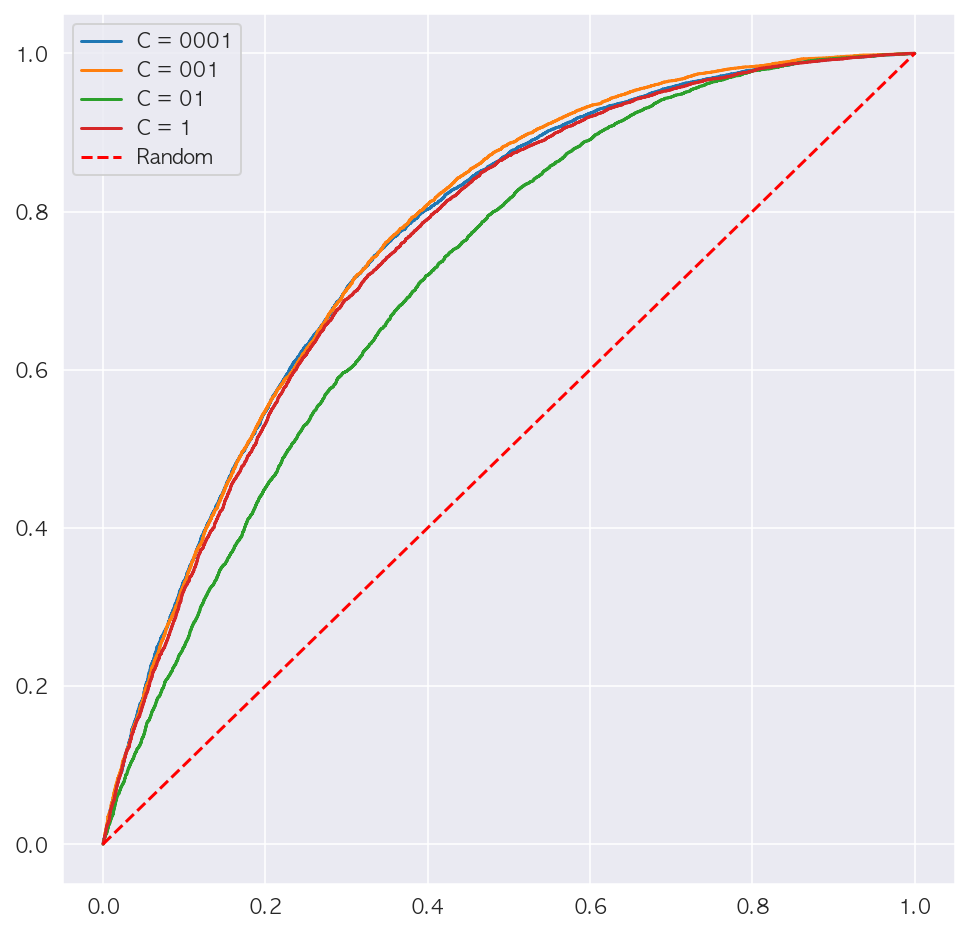

In [126]:
show_roc_curve(models,X_test,y_test)

# Y_test = models[0].decision_function(X_test)
# prob = (Y_test - Y_test.min()) / (Y_test.max() - Y_test.min())
# print('Prob[0]: %.3f' % (1-prob[0]))
# print('Prob[1]: %.3f' % (prob[0]))

### Scalar 적용

In [127]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.fit_transform (X_test)

In [128]:
models = linearSVC(x_train_scaled, y_train)

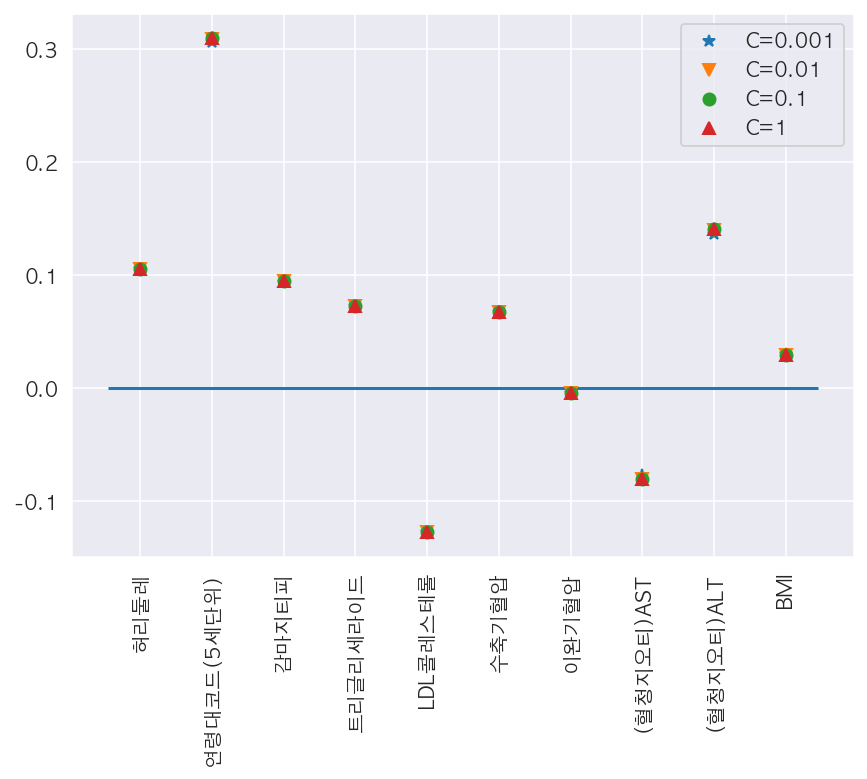

In [129]:
show_coef(models)

C = 0001
TestSet accuarcy : 0.705560326

C = 001
TestSet accuarcy : 0.705452984

C = 01
TestSet accuarcy : 0.705345642

C = 1
TestSet accuarcy : 0.705399313



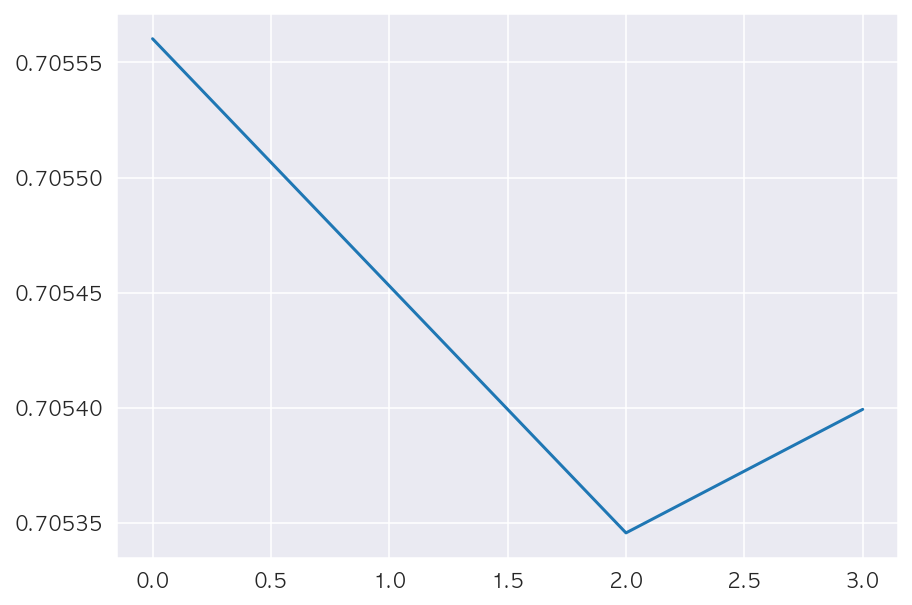

In [130]:
scores = score(models, x_test_scaled,y_test)
show_score(scores)

In [131]:
confusion_matrix(models,x_test_scaled,y_test)

C = 0001
[[6355 2961]
 [2525 6791]] 

C = 001
[[6351 2965]
 [2523 6793]] 

C = 01
[[6350 2966]
 [2524 6792]] 

C = 1
[[6350 2966]
 [2523 6793]] 



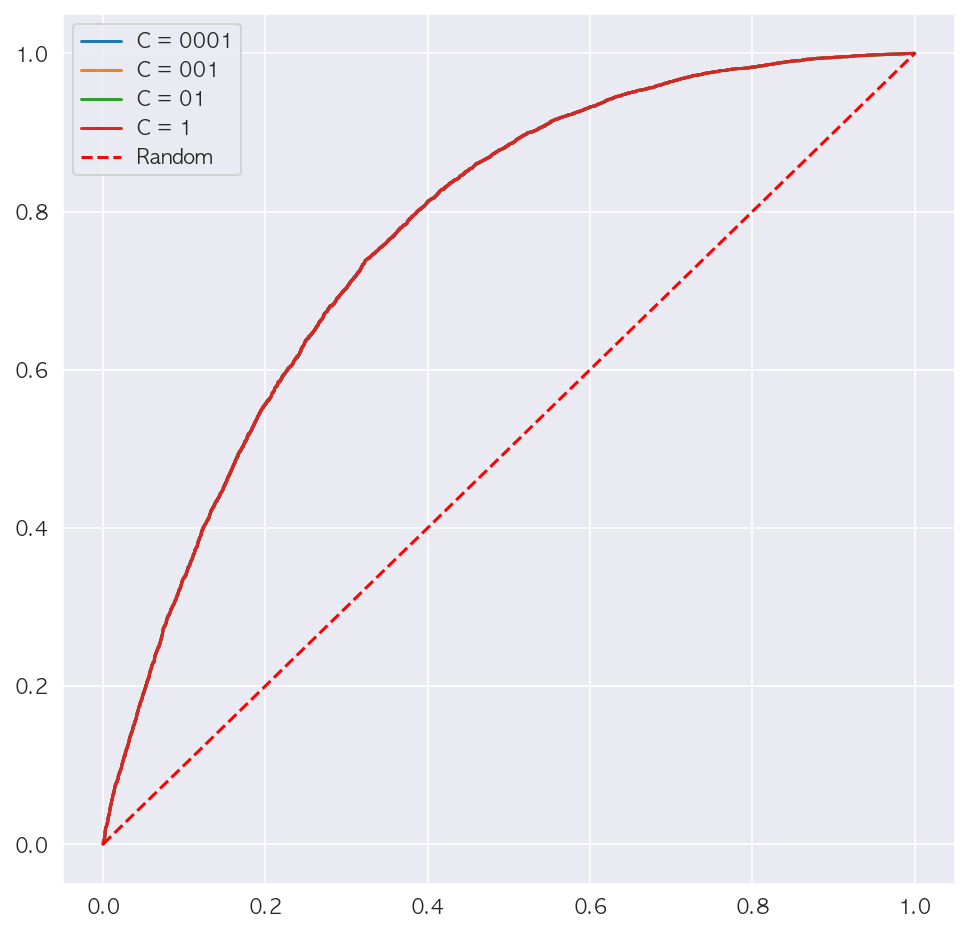

In [132]:
show_roc_curve(models,x_test_scaled,y_test)

## 0.9

In [133]:
models = linearSVC(X_train09, y_train09)

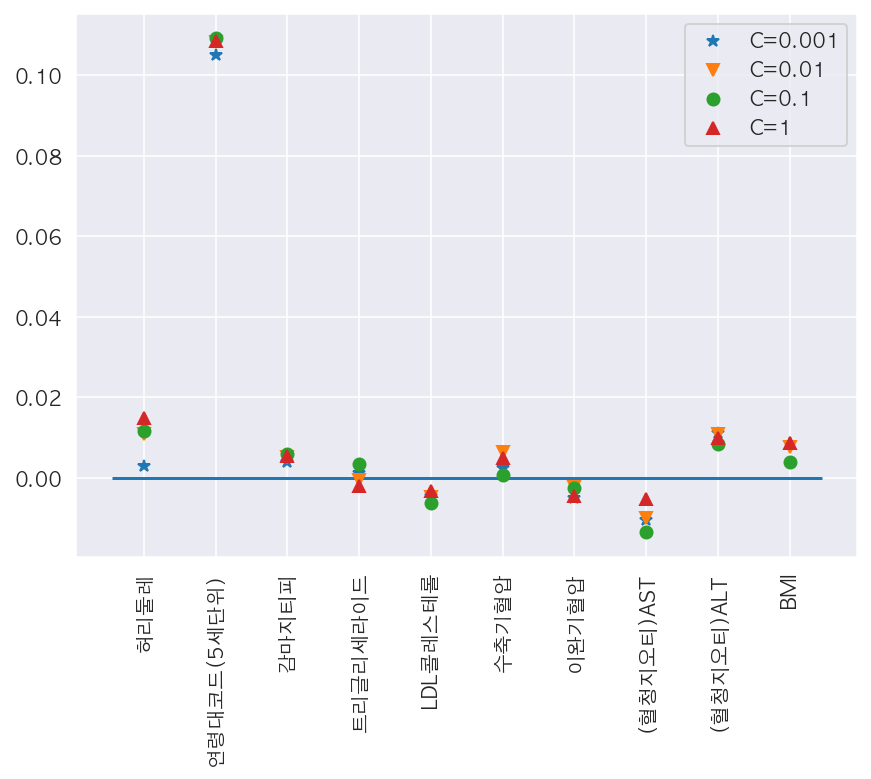

In [134]:
show_coef(models)

C = 0001
TestSet accuarcy : 0.699801698

C = 001
TestSet accuarcy : 0.699293232

C = 01
TestSet accuarcy : 0.566685310

C = 1
TestSet accuarcy : 0.645599227



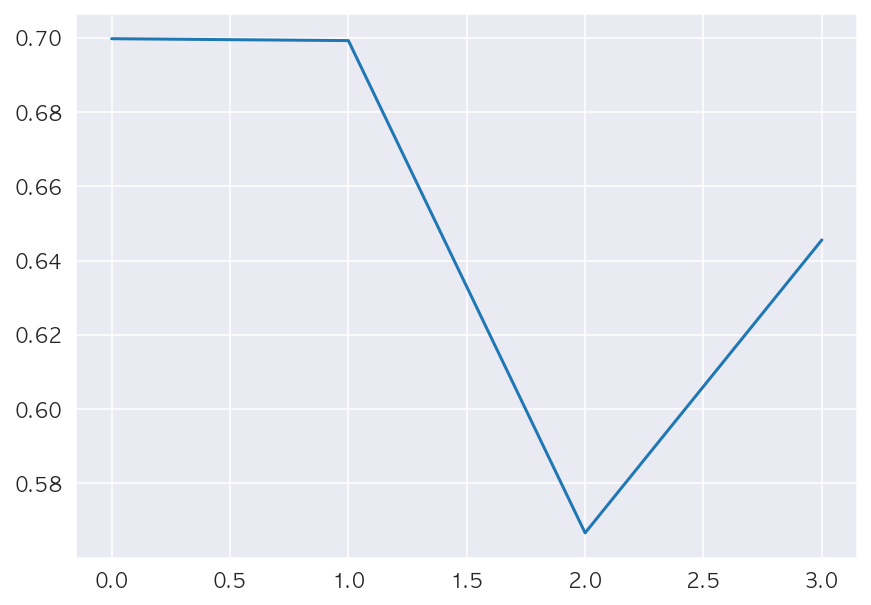

In [135]:
scores = score(models, X_test09, y_test09)
show_score(scores)

In [136]:
confusion_matrix(models,X_test09,y_test09)

C = 0001
[[7459 2892]
 [3012 6304]] 

C = 001
[[7741 2610]
 [3304 6012]] 

C = 01
[[10044   307]
 [ 8215  1101]] 

C = 1
[[8884 1467]
 [5503 3813]] 



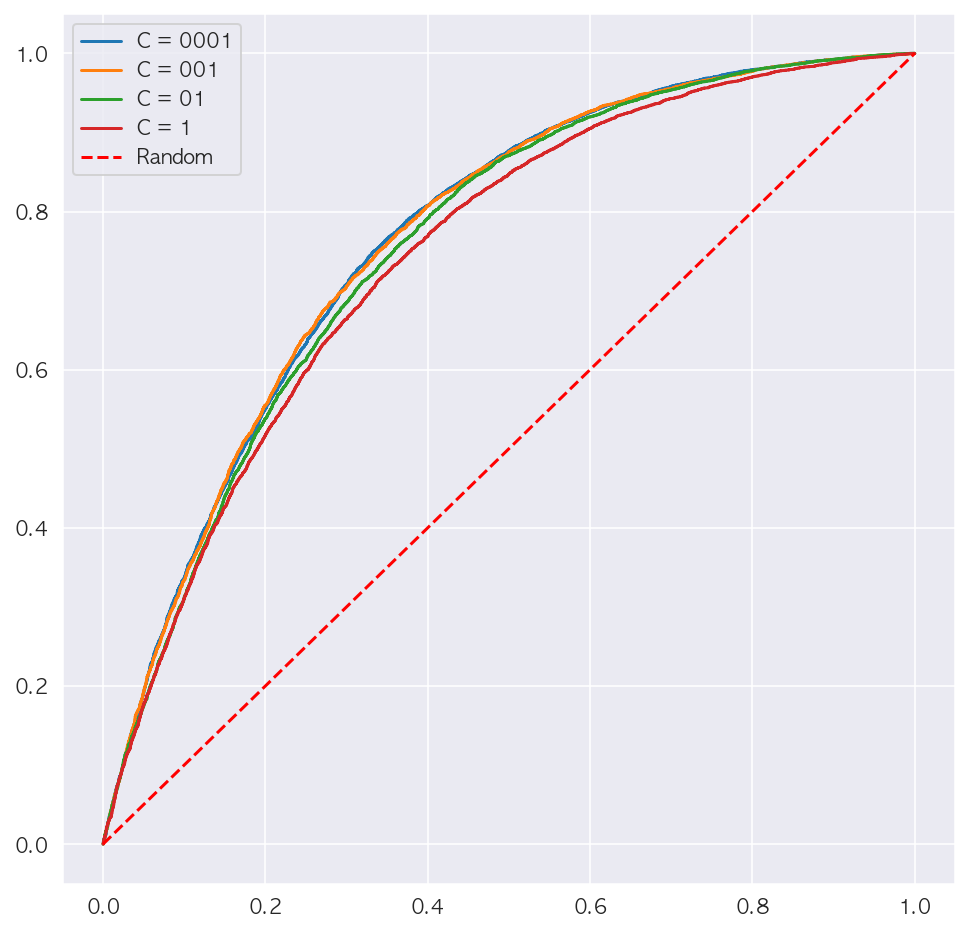

In [137]:
show_roc_curve(models,X_test09,y_test09)

### Scalar

In [138]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train09)
x_test_scaled = scaler.fit_transform (X_test09)

In [139]:
models = linearSVC(x_train_scaled, y_train09)

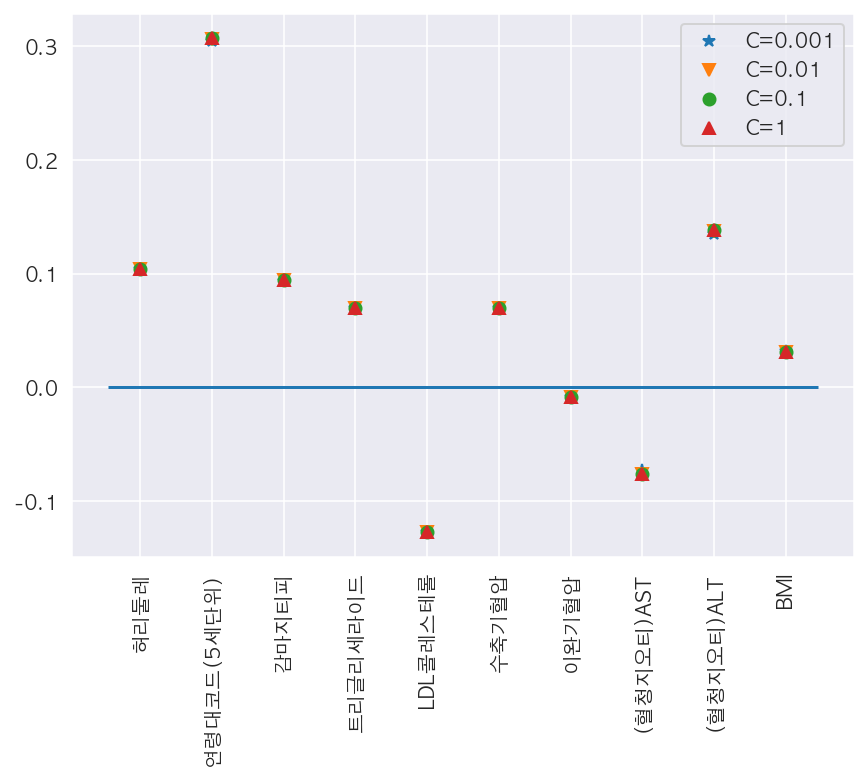

In [140]:
show_coef(models)

C = 0001
TestSet accuarcy : 0.702801647

C = 001
TestSet accuarcy : 0.702547414

C = 01
TestSet accuarcy : 0.702496568

C = 1
TestSet accuarcy : 0.702445721



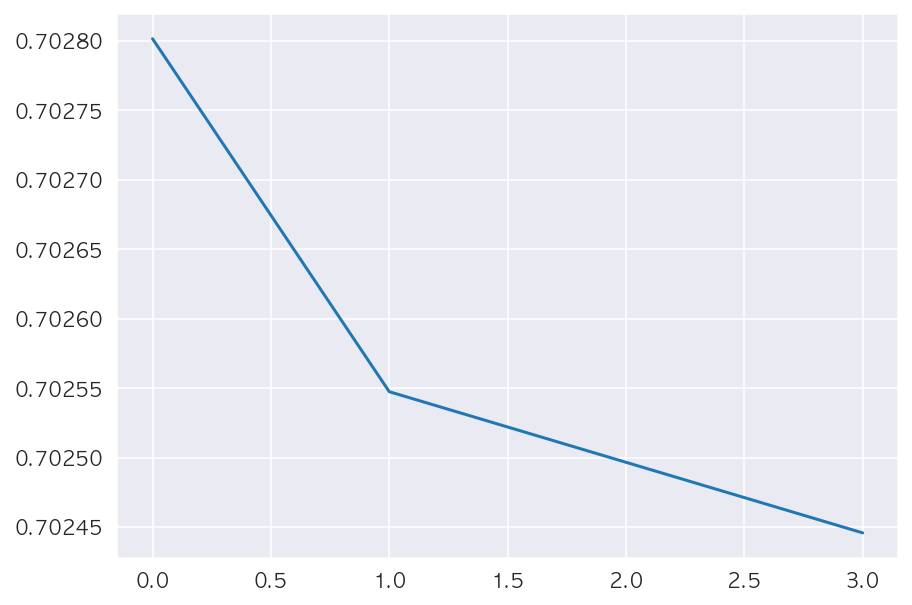

In [141]:
scores = score(models, x_test_scaled,y_test09)
show_score(scores)

In [142]:
confusion_matrix(models,x_test_scaled,y_test09)

C = 0001
[[7384 2967]
 [2878 6438]] 

C = 001
[[7381 2970]
 [2880 6436]] 

C = 01
[[7379 2972]
 [2879 6437]] 

C = 1
[[7379 2972]
 [2880 6436]] 



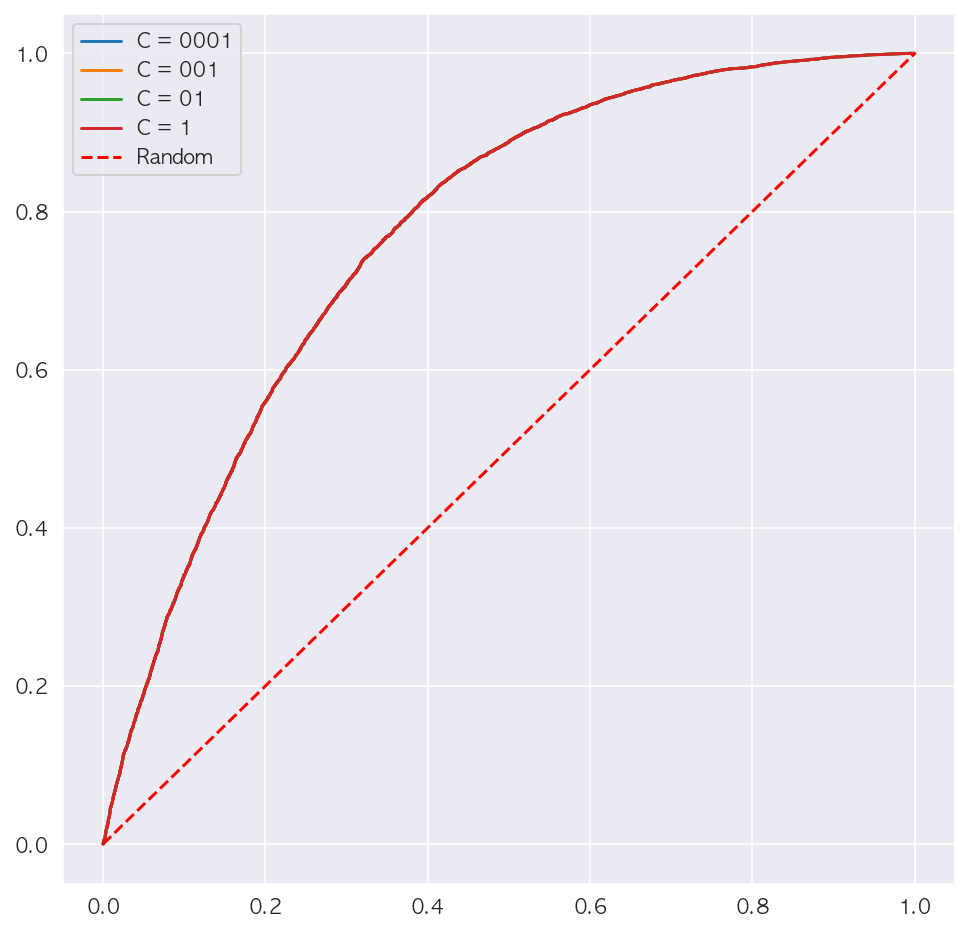

In [143]:
show_roc_curve(models,x_test_scaled,y_test09)

## 0.5

In [144]:
models = linearSVC(X_train05, y_train05)

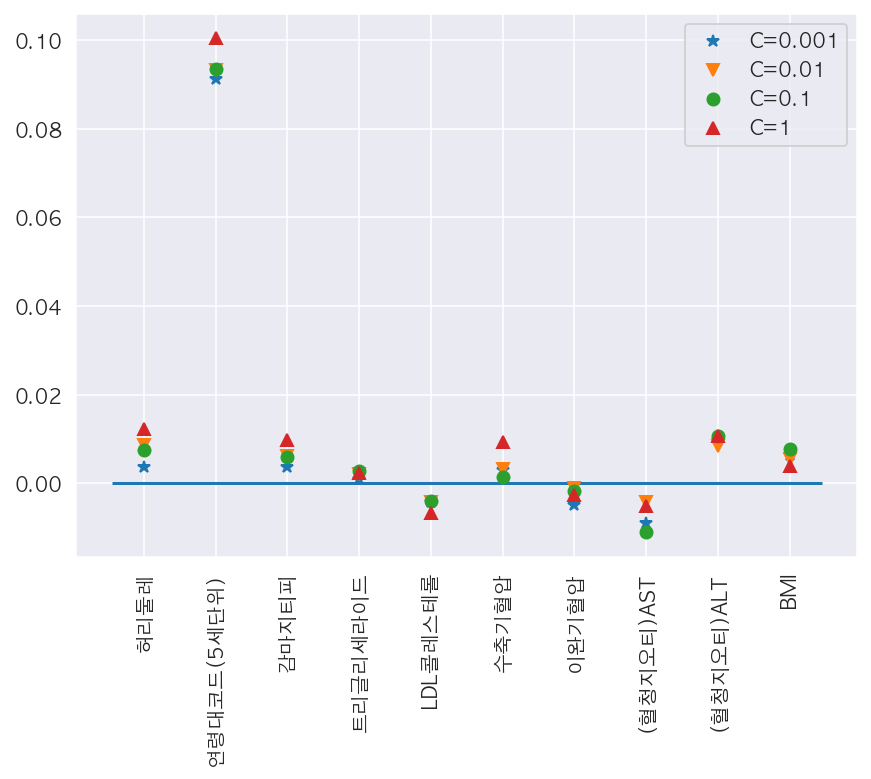

In [145]:
show_coef(models)

C = 0001
TestSet accuarcy : 0.718656076

C = 001
TestSet accuarcy : 0.707742951

C = 01
TestSet accuarcy : 0.687741520

C = 1
TestSet accuarcy : 0.563439244



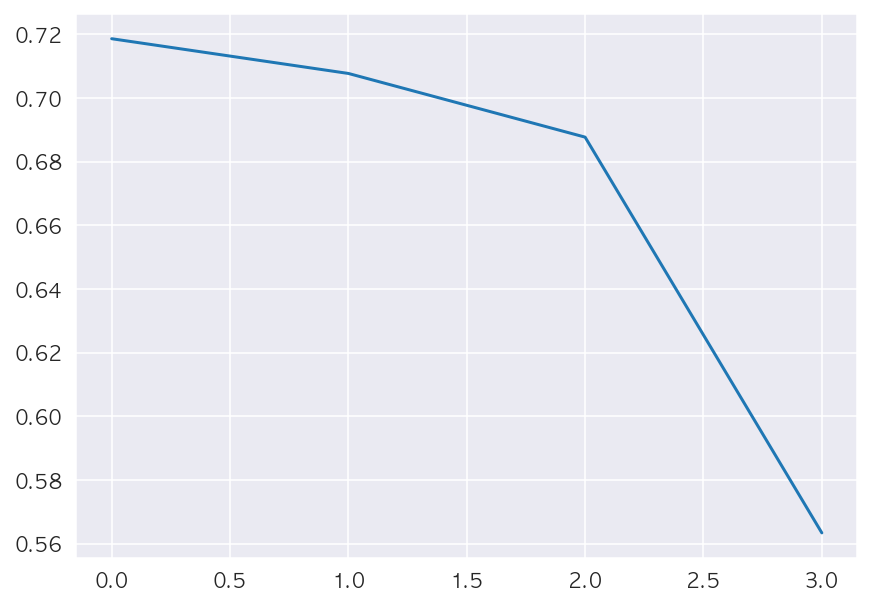

In [146]:
scores = score(models, X_test05, y_test05)
show_score(scores)

In [147]:
confusion_matrix(models,X_test05,y_test05)

C = 0001
[[16411  2221]
 [ 5642  3674]] 

C = 001
[[14271  4361]
 [ 3807  5509]] 

C = 01
[[17861   771]
 [ 7956  1360]] 

C = 1
[[ 7004 11628]
 [  573  8743]] 



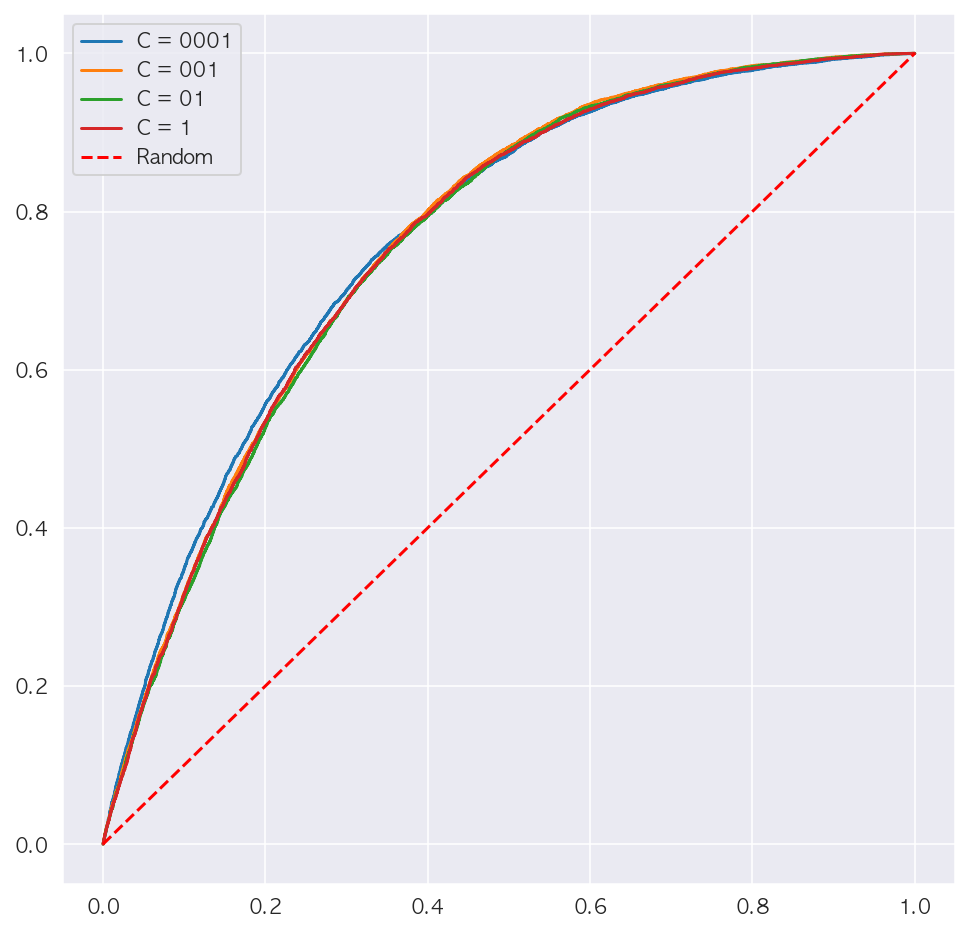

In [148]:
show_roc_curve(models,X_test05,y_test05)

### Scaler

In [149]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train05)
x_test_scaled = scaler.fit_transform (X_test05)

In [150]:
models = linearSVC(x_train_scaled, y_train05)

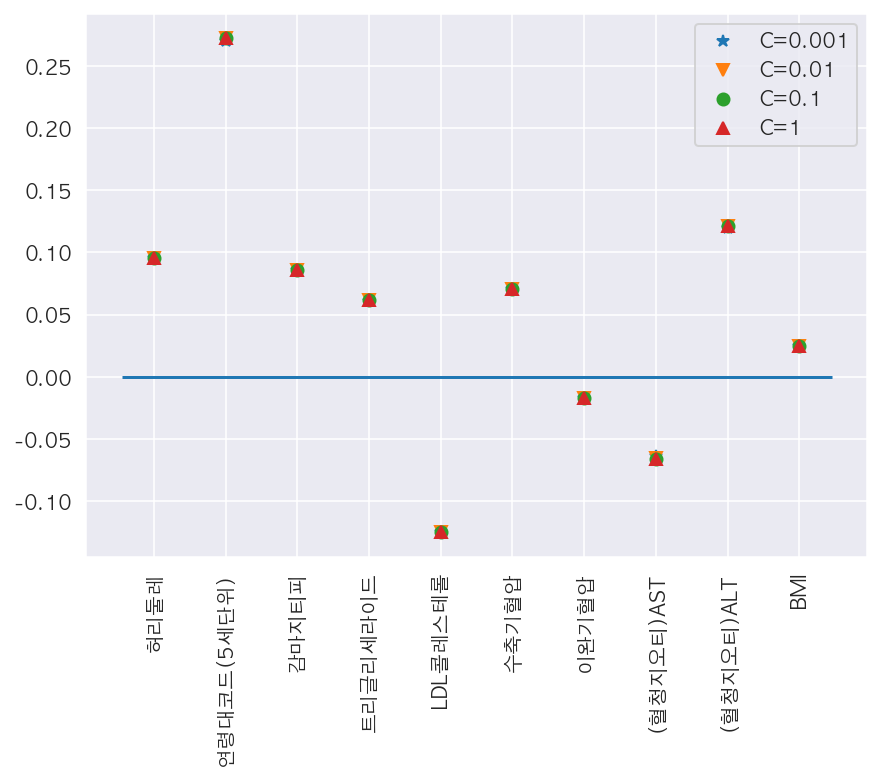

In [151]:
show_coef(models)

C = 0001
TestSet accuarcy : 0.721339631

C = 001
TestSet accuarcy : 0.721446973

C = 01
TestSet accuarcy : 0.721518534

C = 1
TestSet accuarcy : 0.721482754



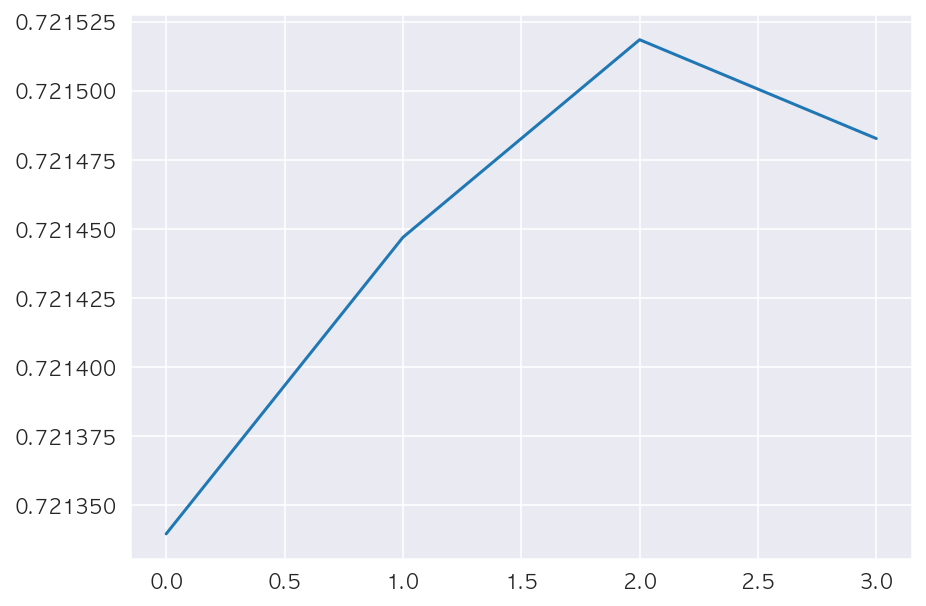

In [152]:
scores = score(models, x_test_scaled,y_test05)
show_score(scores)

In [153]:
confusion_matrix(models,x_test_scaled,y_test05)

C = 0001
[[16220  2412]
 [ 5376  3940]] 

C = 001
[[16223  2409]
 [ 5376  3940]] 

C = 01
[[16226  2406]
 [ 5377  3939]] 

C = 1
[[16226  2406]
 [ 5378  3938]] 



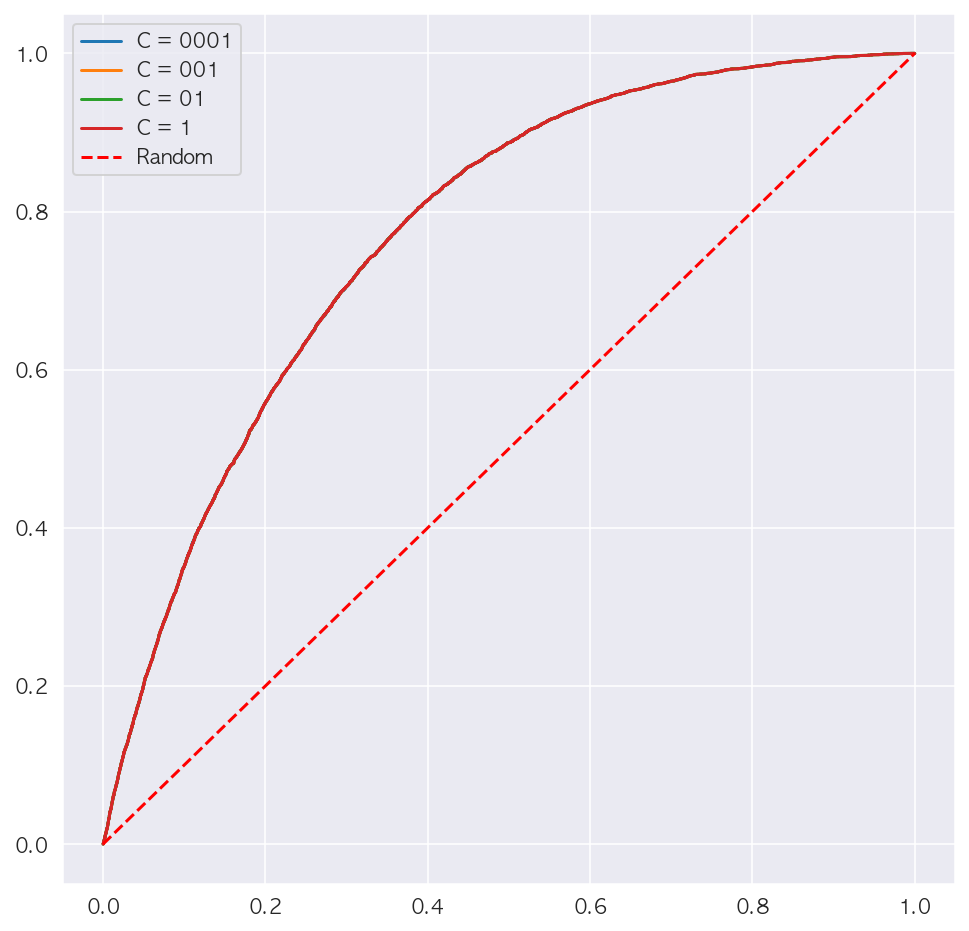

In [154]:
show_roc_curve(models,x_test_scaled,y_test05)

## 0.1

In [155]:
models = linearSVC(X_train01, y_train01)

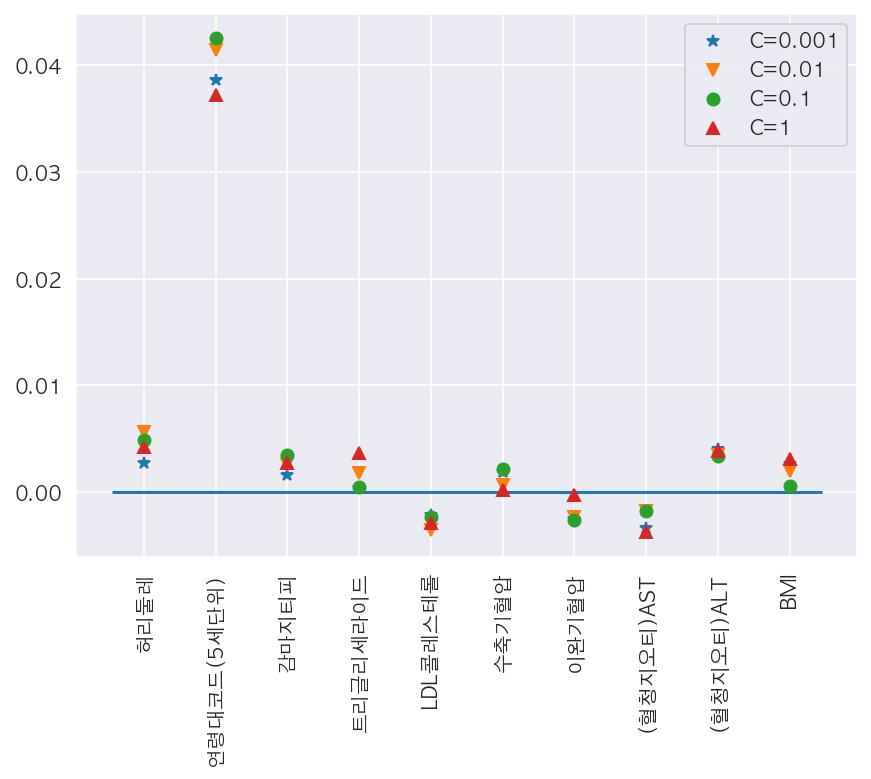

In [156]:
show_coef(models)

C = 0001
TestSet accuarcy : 0.909089135

C = 001
TestSet accuarcy : 0.908698792

C = 01
TestSet accuarcy : 0.909030583

C = 1
TestSet accuarcy : 0.885610008



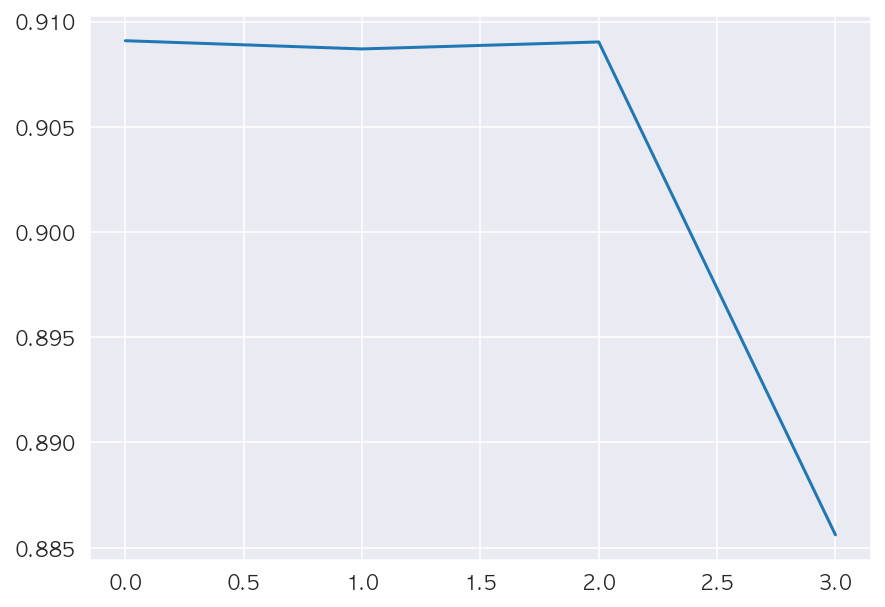

In [157]:
scores = score(models, X_test01, y_test01)
show_score(scores)

In [158]:
confusion_matrix(models,X_test01,y_test01)

C = 0001
[[93158     0]
 [ 9316     0]] 

C = 001
[[93070    88]
 [ 9268    48]] 

C = 01
[[93138    20]
 [ 9302    14]] 

C = 1
[[89903  3255]
 [ 8467   849]] 



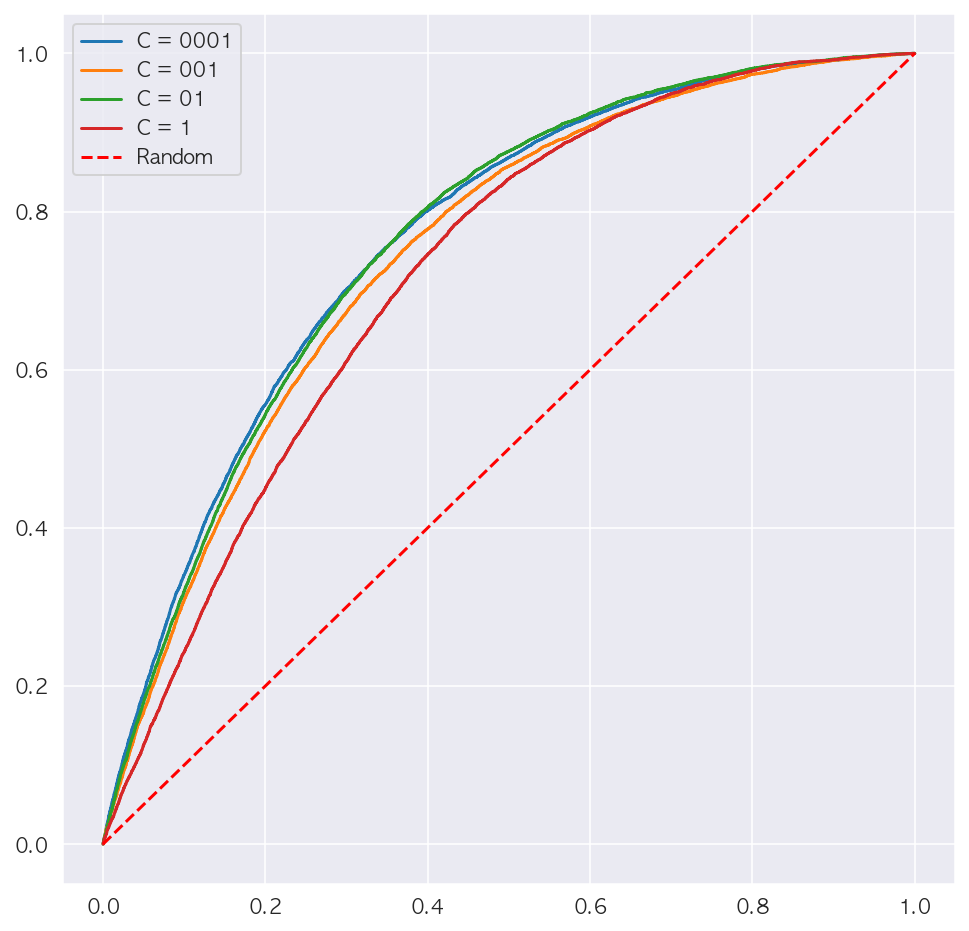

In [160]:
show_roc_curve(models,X_test01,y_test01)

...?

### Scaler

In [161]:
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train01)
x_test_scaled = scaler.fit_transform(X_test01)

In [162]:
models = linearSVC(x_train_scaled, y_train01)

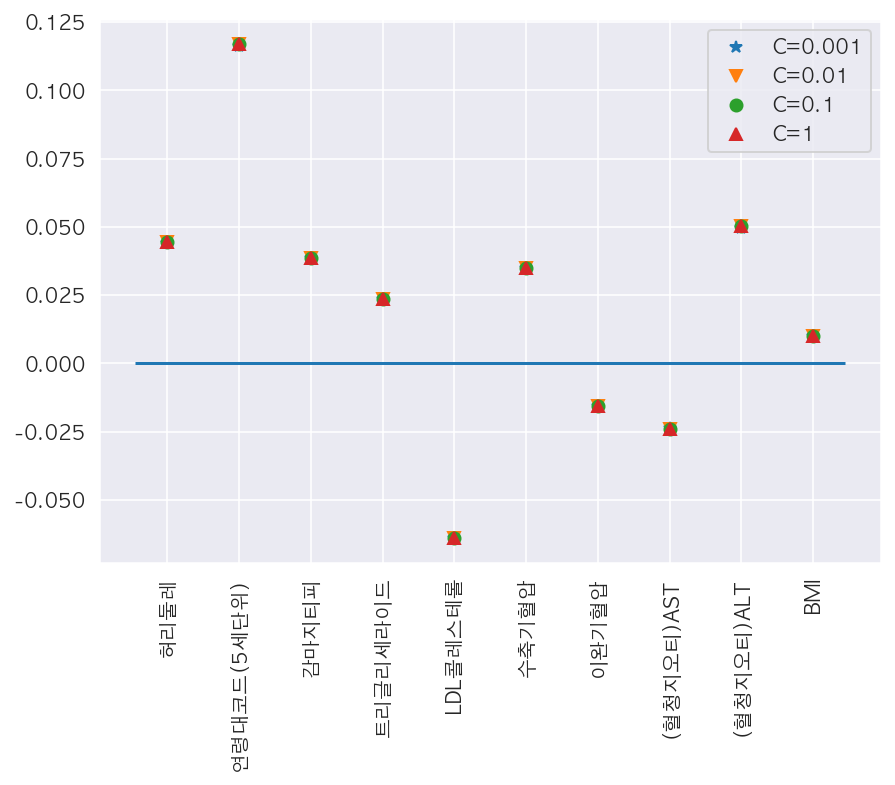

In [163]:
show_coef(models)

C = 0001
TestSet accuarcy : 0.909089135

C = 001
TestSet accuarcy : 0.909089135

C = 01
TestSet accuarcy : 0.909089135

C = 1
TestSet accuarcy : 0.909089135



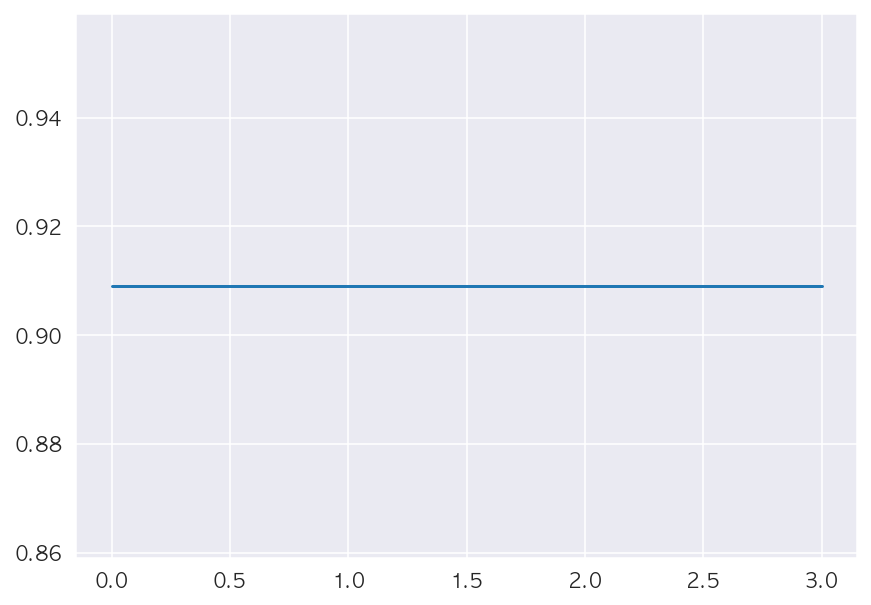

In [164]:
scores = score(models, x_test_scaled,y_test01)
show_score(scores)

In [165]:
confusion_matrix(models,x_test_scaled,y_test01)

C = 0001
[[93158     0]
 [ 9316     0]] 

C = 001
[[93158     0]
 [ 9316     0]] 

C = 01
[[93158     0]
 [ 9316     0]] 

C = 1
[[93158     0]
 [ 9316     0]] 



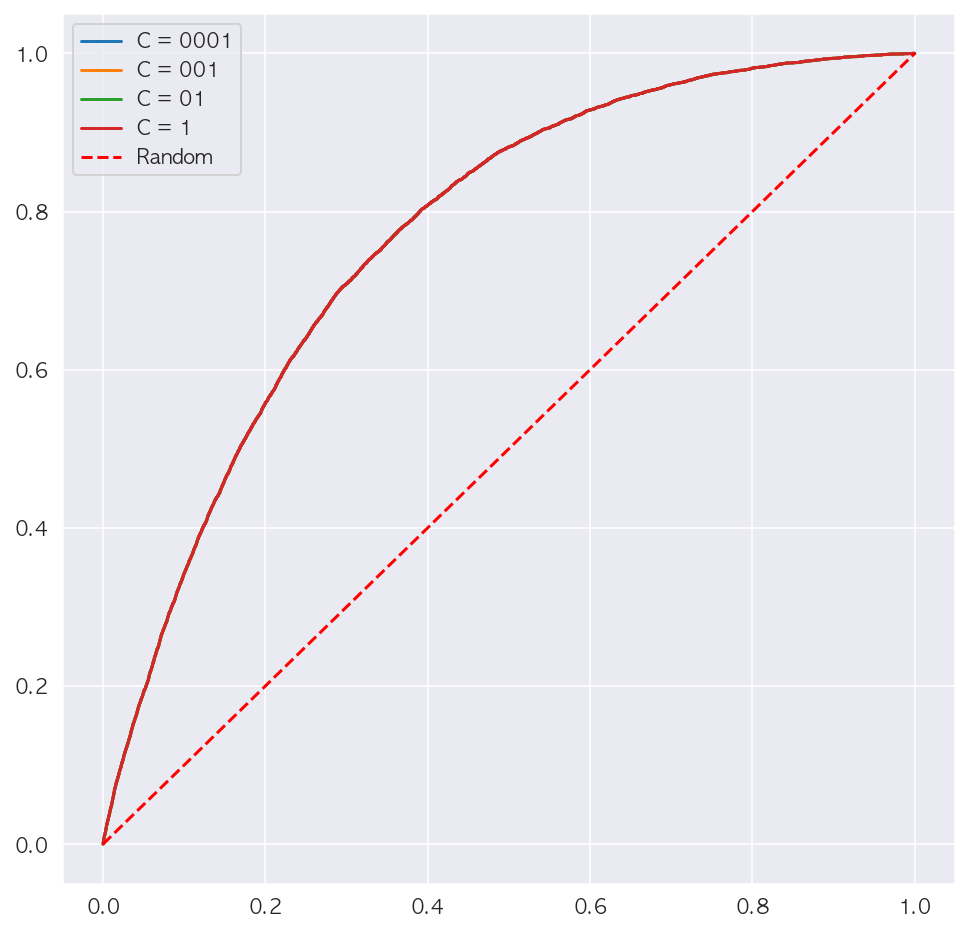

In [166]:
show_roc_curve(models,x_test_scaled,y_test01)

음...

### 비율이 1:1일때, Scaler X,O 인 경우 & 비율 0.9일 때  Sacler 0 인 경우 정확도가 높다.

# Trash

In [ ]:
plt.plot(SVC001.coef_.T, '*',label="C=0.01")
plt.plot(SVC01.coef_.T, 'v',label="C=0.1")
plt.plot(SVC.coef_.T, 'o',label="C=1")
plt.plot(SVC10.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [51]:
SVC = LinearSVC(C=1).fit(X_train, y_train)

In [52]:
SVC10 = LinearSVC(C=10).fit(X_train, y_train)

In [53]:
SVC001 = LinearSVC(C=0.01).fit(X_train, y_train)

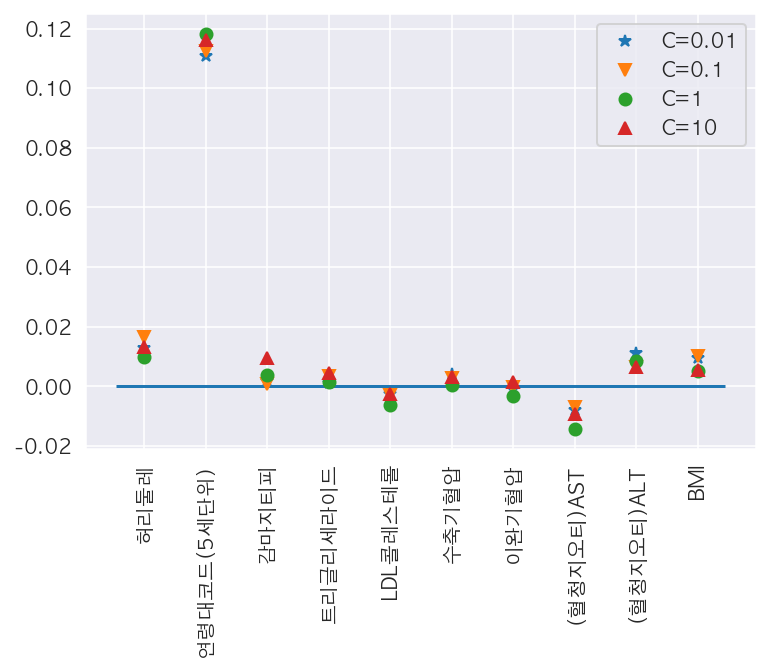

In [54]:
plt.plot(SVC001.coef_.T, '*',label="C=0.01")
plt.plot(SVC01.coef_.T, 'v',label="C=0.1")
plt.plot(SVC.coef_.T, 'o',label="C=1")
plt.plot(SVC10.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [55]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(SVC001.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC001.score(X_test, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(SVC01.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC01.score(X_test, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(SVC.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC.score(X_test, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(SVC10.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC10.score(X_test, y_test)))

C001
TrainSet accuarcy : 0.644392561
TestSet accuarcy : 0.644160584

C01
TrainSet accuarcy : 0.638260473
TestSet accuarcy : 0.635734221

C1
TrainSet accuarcy : 0.502146902
TestSet accuarcy : 0.502361529

C10
TrainSet accuarcy : 0.611035075
TestSet accuarcy : 0.608522971


In [58]:
y_pred001 = SVC001.predict(X_test)
y_pred = SVC.predict(X_test)
y_pred01 = SVC01.predict(X_test)
y_pred10 = SVC10.predict(X_test)

In [60]:
print(metrics.confusion_matrix(y_test, y_pred001),"\n")
print(metrics.confusion_matrix(y_test, y_pred01),"\n")
print(metrics.confusion_matrix(y_test, y_pred),"\n")
print(metrics.confusion_matrix(y_test, y_pred10),"\n")

[[3098 6218]
 [ 412 8904]] 

[[2937 6379]
 [ 408 8908]] 

[[9306   10]
 [9262   54]] 

[[2247 7069]
 [ 225 9091]] 



## scaling

### standard scaler

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)

x_test_scaled = scaler.transform(X_test)

In [62]:
SVC01_scaled = LinearSVC(C=0.1).fit(x_train_scaled, y_train)

In [63]:
SVC_scaled = LinearSVC(C=1).fit(x_train_scaled, y_train)

In [64]:
SVC10_scaled = LinearSVC(C=10).fit(x_train_scaled, y_train)

In [65]:
SVC001_scaled = LinearSVC(C=0.01).fit(x_train_scaled, y_train)

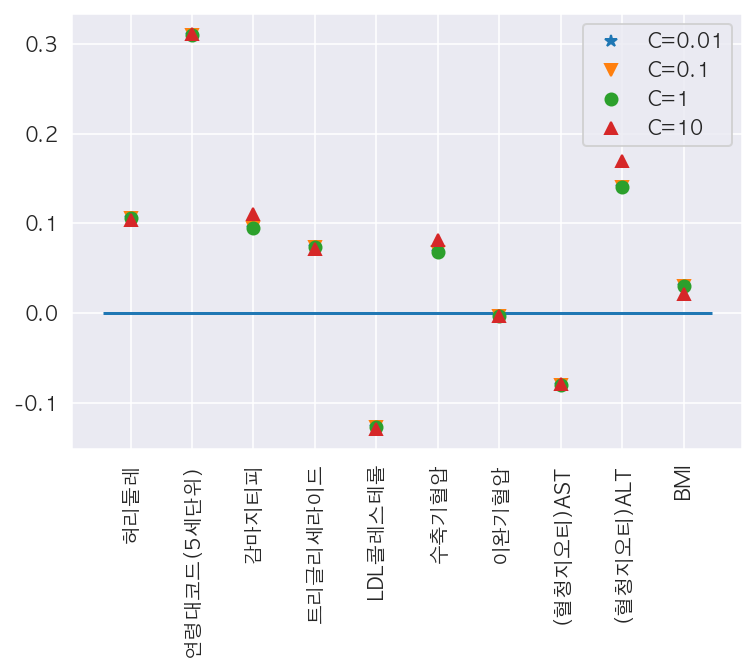

In [66]:
plt.plot(SVC001_scaled.coef_.T, '*',label="C=0.01")
plt.plot(SVC01_scaled.coef_.T, 'v',label="C=0.1")
plt.plot(SVC_scaled.coef_.T, 'o',label="C=1")
plt.plot(SVC10_scaled.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [67]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(SVC001_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC001_scaled.score(x_test_scaled, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(SVC01_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC01_scaled.score(x_test_scaled, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(SVC_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC_scaled.score(x_test_scaled, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(SVC10_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC10_scaled.score(x_test_scaled, y_test)))

C001
TrainSet accuarcy : 0.703700722
TestSet accuarcy : 0.705399313

C01
TrainSet accuarcy : 0.703740976
TestSet accuarcy : 0.705506655

C1
TrainSet accuarcy : 0.703740976
TestSet accuarcy : 0.705506655

C10
TrainSet accuarcy : 0.703163996
TestSet accuarcy : 0.704540575


In [68]:
y_pred001_scaled = SVC001_scaled.predict(X_test)
y_pred01_scaled = SVC01_scaled.predict(X_test)
y_pred_scaled = SVC_scaled.predict(X_test)
y_pred10_scaled = SVC10_scaled.predict(X_test)

In [69]:
print(metrics.confusion_matrix(y_test, y_pred001_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred01_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred10_scaled),"\n")

[[   8 9308]
 [   0 9316]] 

[[   8 9308]
 [   0 9316]] 

[[   8 9308]
 [   0 9316]] 

[[   4 9312]
 [   0 9316]] 



### Minmax scaler

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

x_train_m_scaled = scaler.transform(X_train)

x_test_m_scaled = scaler.transform(X_test)

In [71]:
SVC01_m_scaled = LinearSVC(C=1).fit(x_train_m_scaled, y_train)

In [72]:
SVC_m_scaled = LinearSVC(C=1).fit(x_train_m_scaled, y_train)

In [73]:
SVC10_m_scaled = LinearSVC(C=10).fit(x_train_m_scaled, y_train)

In [74]:
SVC001_m_scaled = LinearSVC(C=0.01).fit(x_train_m_scaled, y_train)

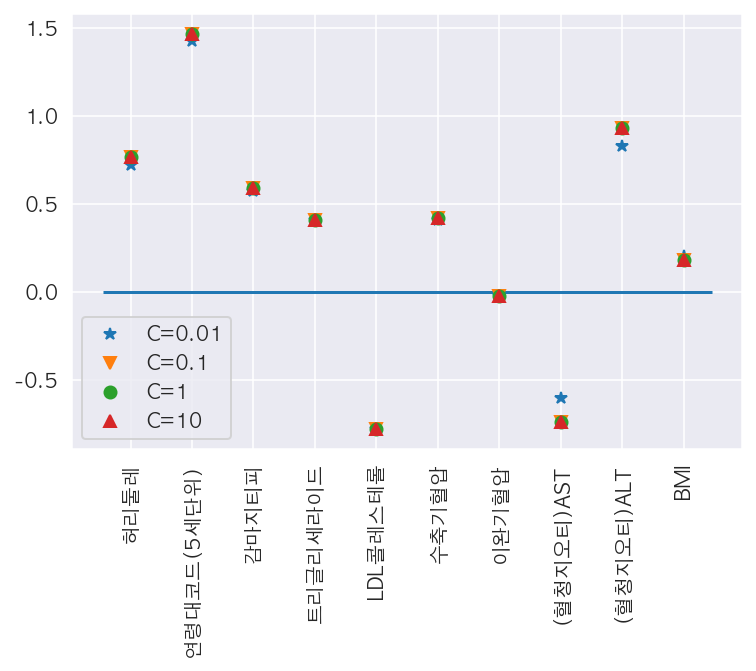

In [75]:
plt.plot(SVC001_m_scaled.coef_.T, '*',label="C=0.01")
plt.plot(SVC01_m_scaled.coef_.T, 'v',label="C=0.1")
plt.plot(SVC_m_scaled.coef_.T, 'o',label="C=1")
plt.plot(SVC10_m_scaled.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [76]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(SVC001_m_scaled.score(x_train_m_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC001_m_scaled.score(x_test_m_scaled, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(SVC01_m_scaled.score(x_train_m_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC01_m_scaled.score(x_test_m_scaled, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(SVC_m_scaled.score(x_train_m_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC_m_scaled.score(x_test_m_scaled, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(SVC10_m_scaled.score(x_train_m_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(SVC10_m_scaled.score(x_test_m_scaled, y_test)))

C001
TrainSet accuarcy : 0.703472614
TestSet accuarcy : 0.705345642

C01
TrainSet accuarcy : 0.703673886
TestSet accuarcy : 0.705452984

C1
TrainSet accuarcy : 0.703673886
TestSet accuarcy : 0.705452984

C10
TrainSet accuarcy : 0.703740976
TestSet accuarcy : 0.705506655


In [77]:
y_pred001_m_scaled = SVC001_m_scaled.predict(X_test)
y_pred01_m_scaled = SVC01_m_scaled.predict(X_test)
y_pred_m_scaled = SVC_m_scaled.predict(X_test)
y_pred10_m_scaled = SVC10_m_scaled.predict(X_test)

In [78]:
print(metrics.confusion_matrix(y_test, y_pred001_m_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred01_m_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred_m_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred10_m_scaled),"\n")

[[  17 9299]
 [   3 9313]] 

[[  15 9301]
 [   1 9315]] 

[[  15 9301]
 [   1 9315]] 

[[  15 9301]
 [   1 9315]] 



허연감 필수
(트리글리세라이드, LDL콜레스테롤, 수축기혈압, 이완기혈압, 혈청지오티, BMI) 1~2개 선택

## feature 변경

In [79]:
X = data[['허리둘레','연령대코드(5세단위)','감마지티피','트리글리세라이드','LDL콜레스테롤','수축기혈압','(혈청지오티)ALT']]
X

,허리둘레,연령대코드(5세단위),감마지티피,트리글리세라이드,LDL콜레스테롤,수축기혈압,(혈청지오티)ALT
0,90.0,8,40.0,92.0,126.0,120.0,35.0
1,89.0,7,27.0,121.0,148.0,130.0,36.0
2,91.0,9,68.0,104.0,74.0,120.0,32.0
3,91.0,11,18.0,106.0,104.0,145.0,34.0
4,80.0,11,25.0,104.0,117.0,138.0,12.0
...,...,...,...,...,...,...,...
1180115,84.0,13,78.0,85.0,140.0,160.0,12.0
1180116,77.0,8,15.0,139.0,60.0,123.0,8.0
1180117,83.0,14,23.0,122.0,148.0,146.0,15.0
1180118,84.0,14,19.0,173.0,148.0,130.0,14.0


In [80]:
y = data['당뇨여부']
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1180115    0.0
1180116    0.0
1180117    0.0
1180118    0.0
1180119    0.0
Name: 당뇨여부, Length: 1180120, dtype: float64

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
svc01 = LinearSVC(C=0.1).fit(X_train, y_train)
svc = LinearSVC(C=1).fit(X_train, y_train)
svc001 = LinearSVC(C=0.01).fit(X_train, y_train)
svc10 = LinearSVC(C=10).fit(X_train, y_train)

In [ ]:
plt.plot(svc001.coef_.T, '*',label="C=0.01")
plt.plot(svc01.coef_.T, 'v',label="C=0.1")
plt.plot(svc.coef_.T, 'o',label="C=1")
plt.plot(svc10.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [ ]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(svc001.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc001.score(X_test, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(svc01.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc01.score(X_test, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(svc.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc.score(X_test, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(svc10.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc10.score(X_test, y_test)))

In [ ]:
y_pred001 = svc001.predict(X_test)
y_pred = svc.predict(X_test)
y_pred01 = svc01.predict(X_test)
y_pred10 = svc10.predict(X_test)

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred001),"\n")
print(metrics.confusion_matrix(y_test, y_pred01),"\n")
print(metrics.confusion_matrix(y_test, y_pred),"\n")
print(metrics.confusion_matrix(y_test, y_pred10),"\n")

## scaler

### MinMax

In [201]:
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [202]:
svc01_scaled = LinearSVC(C=0.1).fit(X_train_scaled, y_train)
svc_scaled = LinearSVC(C=1).fit(X_train_scaled, y_train)
svc001_scaled = LinearSVC(C=0.01).fit(X_train_scaled, y_train)
svc10_scaled = LinearSVC(C=10).fit(X_train_scaled, y_train)

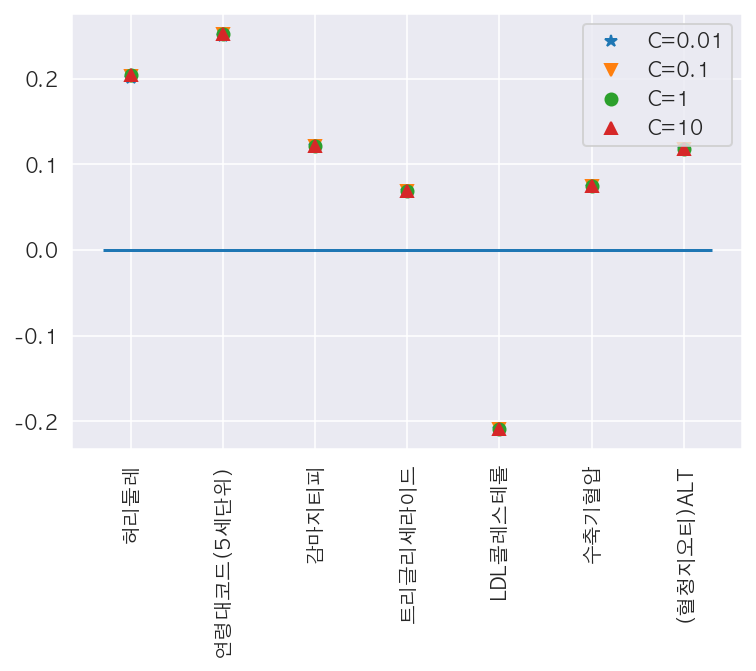

In [203]:
plt.plot(svc001_scaled.coef_.T, '*',label="C=0.01")
plt.plot(svc01_scaled.coef_.T, 'v',label="C=0.1")
plt.plot(svc_scaled.coef_.T, 'o',label="C=1")
plt.plot(svc10_scaled.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [204]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(svc001_scaled.score(X_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc001_scaled.score(X_test_scaled, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(svc01_scaled.score(X_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc01_scaled.score(X_test_scaled, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(svc_scaled.score(X_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc_scaled.score(X_test_scaled, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(svc10_scaled.score(X_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc10_scaled.score(X_test_scaled, y_test)))

C001
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C01
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C1
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253

C10
TrainSet accuarcy : 0.960535793
TestSet accuarcy : 0.960508253


In [210]:
y_pred001_scaled = svc001_scaled.predict(X_test)
y_pred01_scaled = svc01_scaled.predict(X_test)
y_pred_scaled = svc_scaled.predict(X_test)
y_pred10_scaled = svc10_scaled.predict(X_test)

In [211]:
print(metrics.confusion_matrix(y_test, y_pred001_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred01_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred10_scaled),"\n")

[[  5616 221087]
 [    45   9276]] 

[[  4878 221825]
 [    37   9284]] 

[[  4810 221893]
 [    36   9285]] 

[[  4802 221901]
 [    36   9285]] 



답이 없다..

## 연령대 제거

In [5]:
X = data[['허리둘레','감마지티피','트리글리세라이드','LDL콜레스테롤','수축기혈압','이완기혈압','(혈청지오티)AST', '(혈청지오티)ALT']]
X

,허리둘레,감마지티피,트리글리세라이드,LDL콜레스테롤,수축기혈압,이완기혈압,(혈청지오티)AST,(혈청지오티)ALT
0,90.0,40.0,92.0,126.0,120.0,80.0,21.0,35.0
1,89.0,27.0,121.0,148.0,130.0,82.0,20.0,36.0
2,91.0,68.0,104.0,74.0,120.0,70.0,47.0,32.0
3,91.0,18.0,106.0,104.0,145.0,87.0,29.0,34.0
4,80.0,25.0,104.0,117.0,138.0,82.0,19.0,12.0
...,...,...,...,...,...,...,...,...
1180115,84.0,78.0,85.0,140.0,160.0,90.0,34.0,12.0
1180116,77.0,15.0,139.0,60.0,123.0,89.0,11.0,8.0
1180117,83.0,23.0,122.0,148.0,146.0,69.0,21.0,15.0
1180118,84.0,19.0,173.0,148.0,130.0,80.0,29.0,14.0


In [6]:
y = data['당뇨여부']
y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1180115    0.0
1180116    0.0
1180117    0.0
1180118    0.0
1180119    0.0
Name: 당뇨여부, Length: 1180120, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [10]:
svc01 = LinearSVC(C=0.1).fit(X_train, y_train)
svc = LinearSVC(C=1).fit(X_train, y_train)
svc001 = LinearSVC(C=0.01).fit(X_train, y_train)
svc10 = LinearSVC(C=10).fit(X_train, y_train)

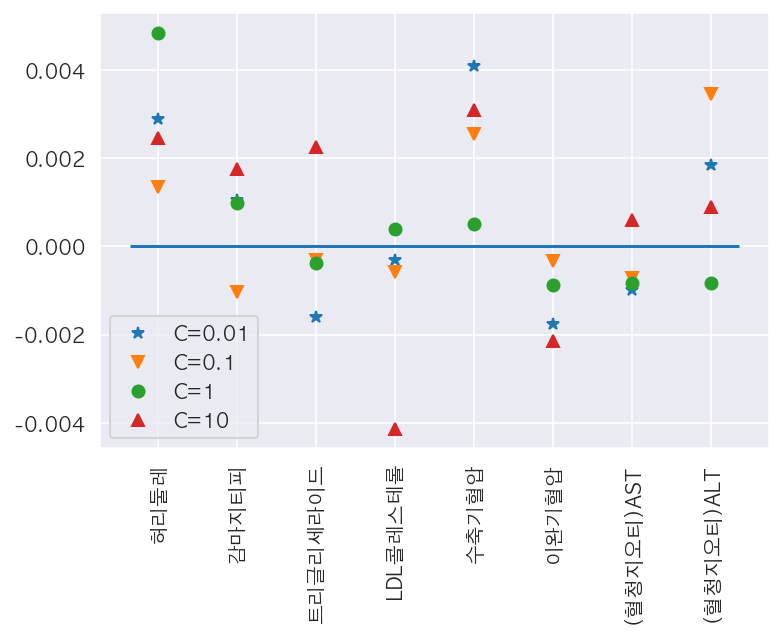

In [12]:
plt.plot(svc001.coef_.T, '*',label="C=0.01")
plt.plot(svc01.coef_.T, 'v',label="C=0.1")
plt.plot(svc.coef_.T, 'o',label="C=1")
plt.plot(svc10.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [13]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(svc001.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc001.score(X_test, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(svc01.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc01.score(X_test, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(svc.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc.score(X_test, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(svc10.score(X_train, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc10.score(X_test, y_test)))

C001
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C01
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C1
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C10
TrainSet accuarcy : 0.960099397
TestSet accuarcy : 0.960249805


In [14]:
y_pred001 = svc001.predict(X_test)
y_pred = svc.predict(X_test)
y_pred01 = svc01.predict(X_test)
y_pred10 = svc10.predict(X_test)

In [15]:
print(metrics.confusion_matrix(y_test, y_pred001),"\n")
print(metrics.confusion_matrix(y_test, y_pred01),"\n")
print(metrics.confusion_matrix(y_test, y_pred),"\n")
print(metrics.confusion_matrix(y_test, y_pred10),"\n")

[[226737      0]
 [  9287      0]] 

[[226737      0]
 [  9287      0]] 

[[226737      0]
 [  9287      0]] 

[[226619    118]
 [  9264     23]] 



In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)

x_test_scaled = scaler.transform(X_test)

In [18]:
svc01_scaled = LinearSVC(C=0.1).fit(x_train_scaled, y_train)
svc_scaled = LinearSVC(C=1).fit(x_train_scaled, y_train)
svc001_scaled = LinearSVC(C=0.01).fit(x_train_scaled, y_train)
svc10_scaled = LinearSVC(C=10).fit(x_train_scaled, y_train)

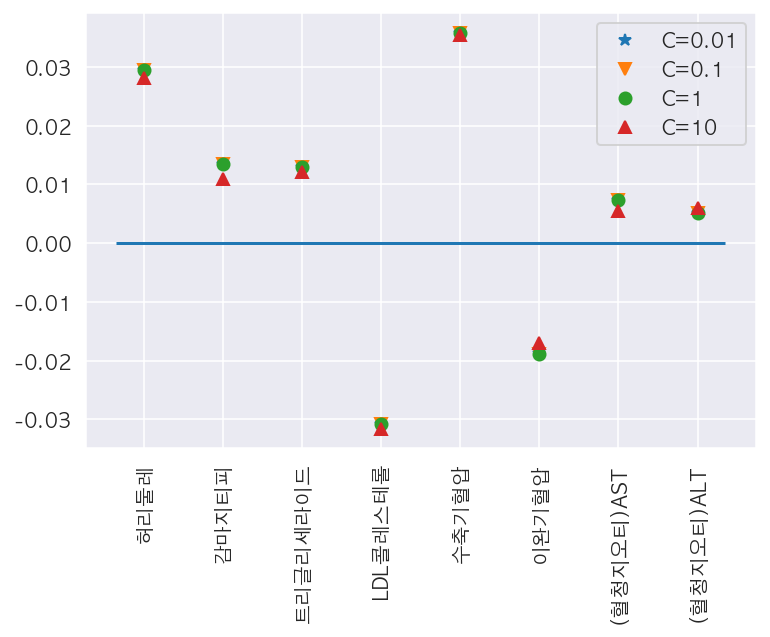

In [19]:
plt.plot(svc001_scaled.coef_.T, '*',label="C=0.01")
plt.plot(svc01_scaled.coef_.T, 'v',label="C=0.1")
plt.plot(svc_scaled.coef_.T, 'o',label="C=1")
plt.plot(svc10_scaled.coef_.T, '^',label="C=10")

plt.xticks(range(len(X.columns)),X.columns,rotation=90)
xlims = plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.legend()

In [21]:
print("C001")
print("TrainSet accuarcy : {:.9f}".format(svc001_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc001_scaled.score(x_test_scaled, y_test)))
print("\nC01")
print("TrainSet accuarcy : {:.9f}".format(svc01_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc01_scaled.score(x_test_scaled, y_test)))
print("\nC1")
print("TrainSet accuarcy : {:.9f}".format(svc_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc_scaled.score(x_test_scaled, y_test)))

print("\nC10")
print("TrainSet accuarcy : {:.9f}".format(svc10_scaled.score(x_train_scaled, y_train)))
print("TestSet accuarcy : {:.9f}".format(svc10_scaled.score(x_test_scaled, y_test)))

C001
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C01
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C1
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307

C10
TrainSet accuarcy : 0.960499780
TestSet accuarcy : 0.960652307


In [22]:
y_pred001_scaled = svc001_scaled.predict(X_test)
y_pred01_scaled = svc01_scaled.predict(X_test)
y_pred_scaled = svc_scaled.predict(X_test)
y_pred10_scaled = svc10_scaled.predict(X_test)

In [24]:
print(metrics.confusion_matrix(y_test, y_pred001_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred01_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred_scaled),"\n")
print(metrics.confusion_matrix(y_test, y_pred10_scaled),"\n")

[[  2334 224403]
 [    23   9264]] 

[[  2333 224404]
 [    23   9264]] 

[[  2333 224404]
 [    23   9264]] 

[[  4052 222685]
 [    44   9243]] 

